# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# file path for the data
#Data from here below
#https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
#data_path = '/content/drive/MyDrive/Applied_Machine_Learning/Final_Project/wdbc.data'  # Jason's drive
#data_path = '/content/drive/MyDrive/Sem 1/AML/wdbc.data' #Aylmer's drive
#data_path = '/content/drive/MyDrive/AML/wdbc.data'  #Cat's drive
#data_path = '/content/wdbc.data' #Sejal's drive


# Import packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.base import TransformerMixin
from xgboost import XGBClassifier

# Load data

In [ ]:
column_names = [
    "ID", "Diagnosis",
    "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness",
    "Mean Compactness", "Mean Concavity", "Mean Concave Points", "Mean Symmetry", "Mean Fractal Dimension",
    "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE", "Compactness SE",
    "Concavity SE", "Concave Points SE", "Symmetry SE", "Fractal Dimension SE",
    "Worst Radius", "Worst Texture", "Worst Perimeter", "Worst Area", "Worst Smoothness",
    "Worst Compactness", "Worst Concavity", "Worst Concave Points", "Worst Symmetry", "Worst Fractal Dimension"
]

In [ ]:
import pandas as pd

# Load the data and specify column names
df = pd.read_csv(data_path, header=None, names=column_names)

# Display the first few rows of the data
df.head()

ID Diagnosis  Mean Radius  Mean Texture  Mean Perimeter  Mean Area  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Mean Smoothness  Mean Compactness  Mean Concavity  Mean Concave Points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Worst Radius  Worst Texture  Worst Perimeter  Worst Area  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   Worst Smoothness  Worst Compactness  Worst Concavity  Worst Concave Points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   Worst Symmetry  Worst Fractal Dimension  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [ ]:
# Binarize Diagnosis column
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    int64  
 2   Mean Radius              569 non-null    float64
 3   Mean Texture             569 non-null    float64
 4   Mean Perimeter           569 non-null    float64
 5   Mean Area                569 non-null    float64
 6   Mean Smoothness          569 non-null    float64
 7   Mean Compactness         569 non-null    float64
 8   Mean Concavity           569 non-null    float64
 9   Mean Concave Points      569 non-null    float64
 10  Mean Symmetry            569 non-null    float64
 11  Mean Fractal Dimension   569 non-null    float64
 12  Radius SE                569 non-null    float64
 13  Texture SE               569 non-null    float64
 14  Perimeter SE             5

In [ ]:
df.describe()

ID   Diagnosis  Mean Radius  Mean Texture  Mean Perimeter  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         Mean Area  Mean Smoothness  Mean Compactness  Mean Concavity  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min     143.500000         0.052630          0.019380        0.000000   
25%     420.300000         0.086370          0.064920        0.029560   
50%     551.100000         0.095870          0.092630        0.061540   
75%     782.700000         0.105300          0.130400        0.130700   
max    2501.000000         0.163400          0.345400        0.426800   

       Mean Concave Points  ...  Worst Radius  Worst Texture  Worst Perimeter  \
count           569.000000  ...    569.000000     569.000000       569.000000   
mean              0.048919  ...     16.269190      25.677223       107.261213   
std               0.038803  ...      4.833242       6.146258        33.602542   
min               0.000000  ...      7.930000      12.020000        50.410000   
25%               0.020310  ...     13.010000      21.080000        84.110000   
50%               0.033500  ...     14.970000      25.410000        97.660000   
75%               0.074000  ...     18.790000      29.720000       125.400000   
max               0.201200  ...     36.040000      49.540000       251.200000   

        Worst Area  Worst Smoothness  Worst Compactness  Worst Concavity  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       Worst Concave Points  Worst Symmetry  Worst Fractal Dimension  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 32 columns]

# EDA

## Target variable analysis

In [ ]:
# Your code here
class_dist_df = df['Diagnosis'].value_counts()
class_dist_df_normalized = class_dist_df / class_dist_df.sum()
print(class_dist_df)
print(class_dist_df_normalized)

Diagnosis
0    357
1    212
Name: count, dtype: int64
Diagnosis
0    0.627417
1    0.372583
Name: count, dtype: float64


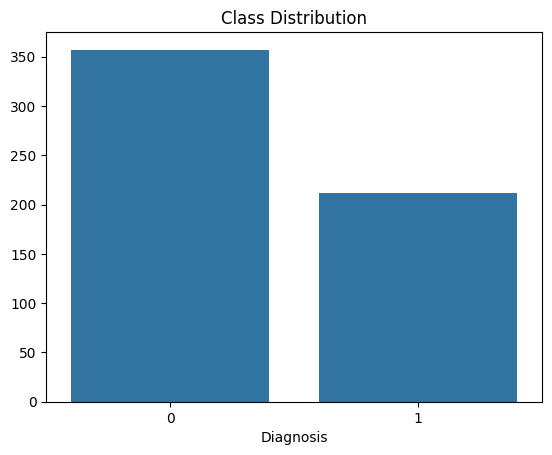

In [ ]:
# Plot class distribution
sns.barplot(x=class_dist_df.index, y=class_dist_df.values, errorbar=None)
plt.title("Class Distribution")
plt.show()

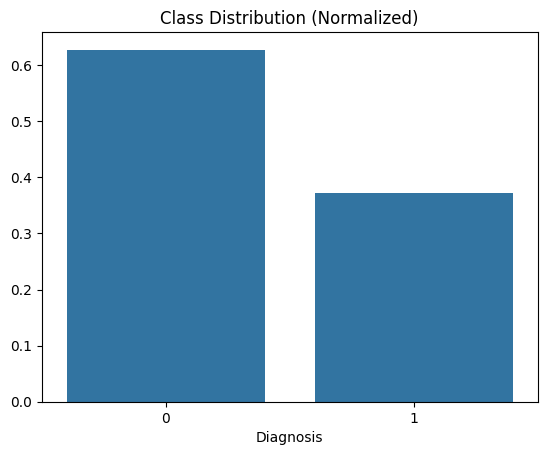

In [ ]:
sns.barplot(x=class_dist_df_normalized.index, y=class_dist_df_normalized.values, errorbar=None)
plt.title("Class Distribution (Normalized)")
plt.show()

## Scatterplots of variables vs. target

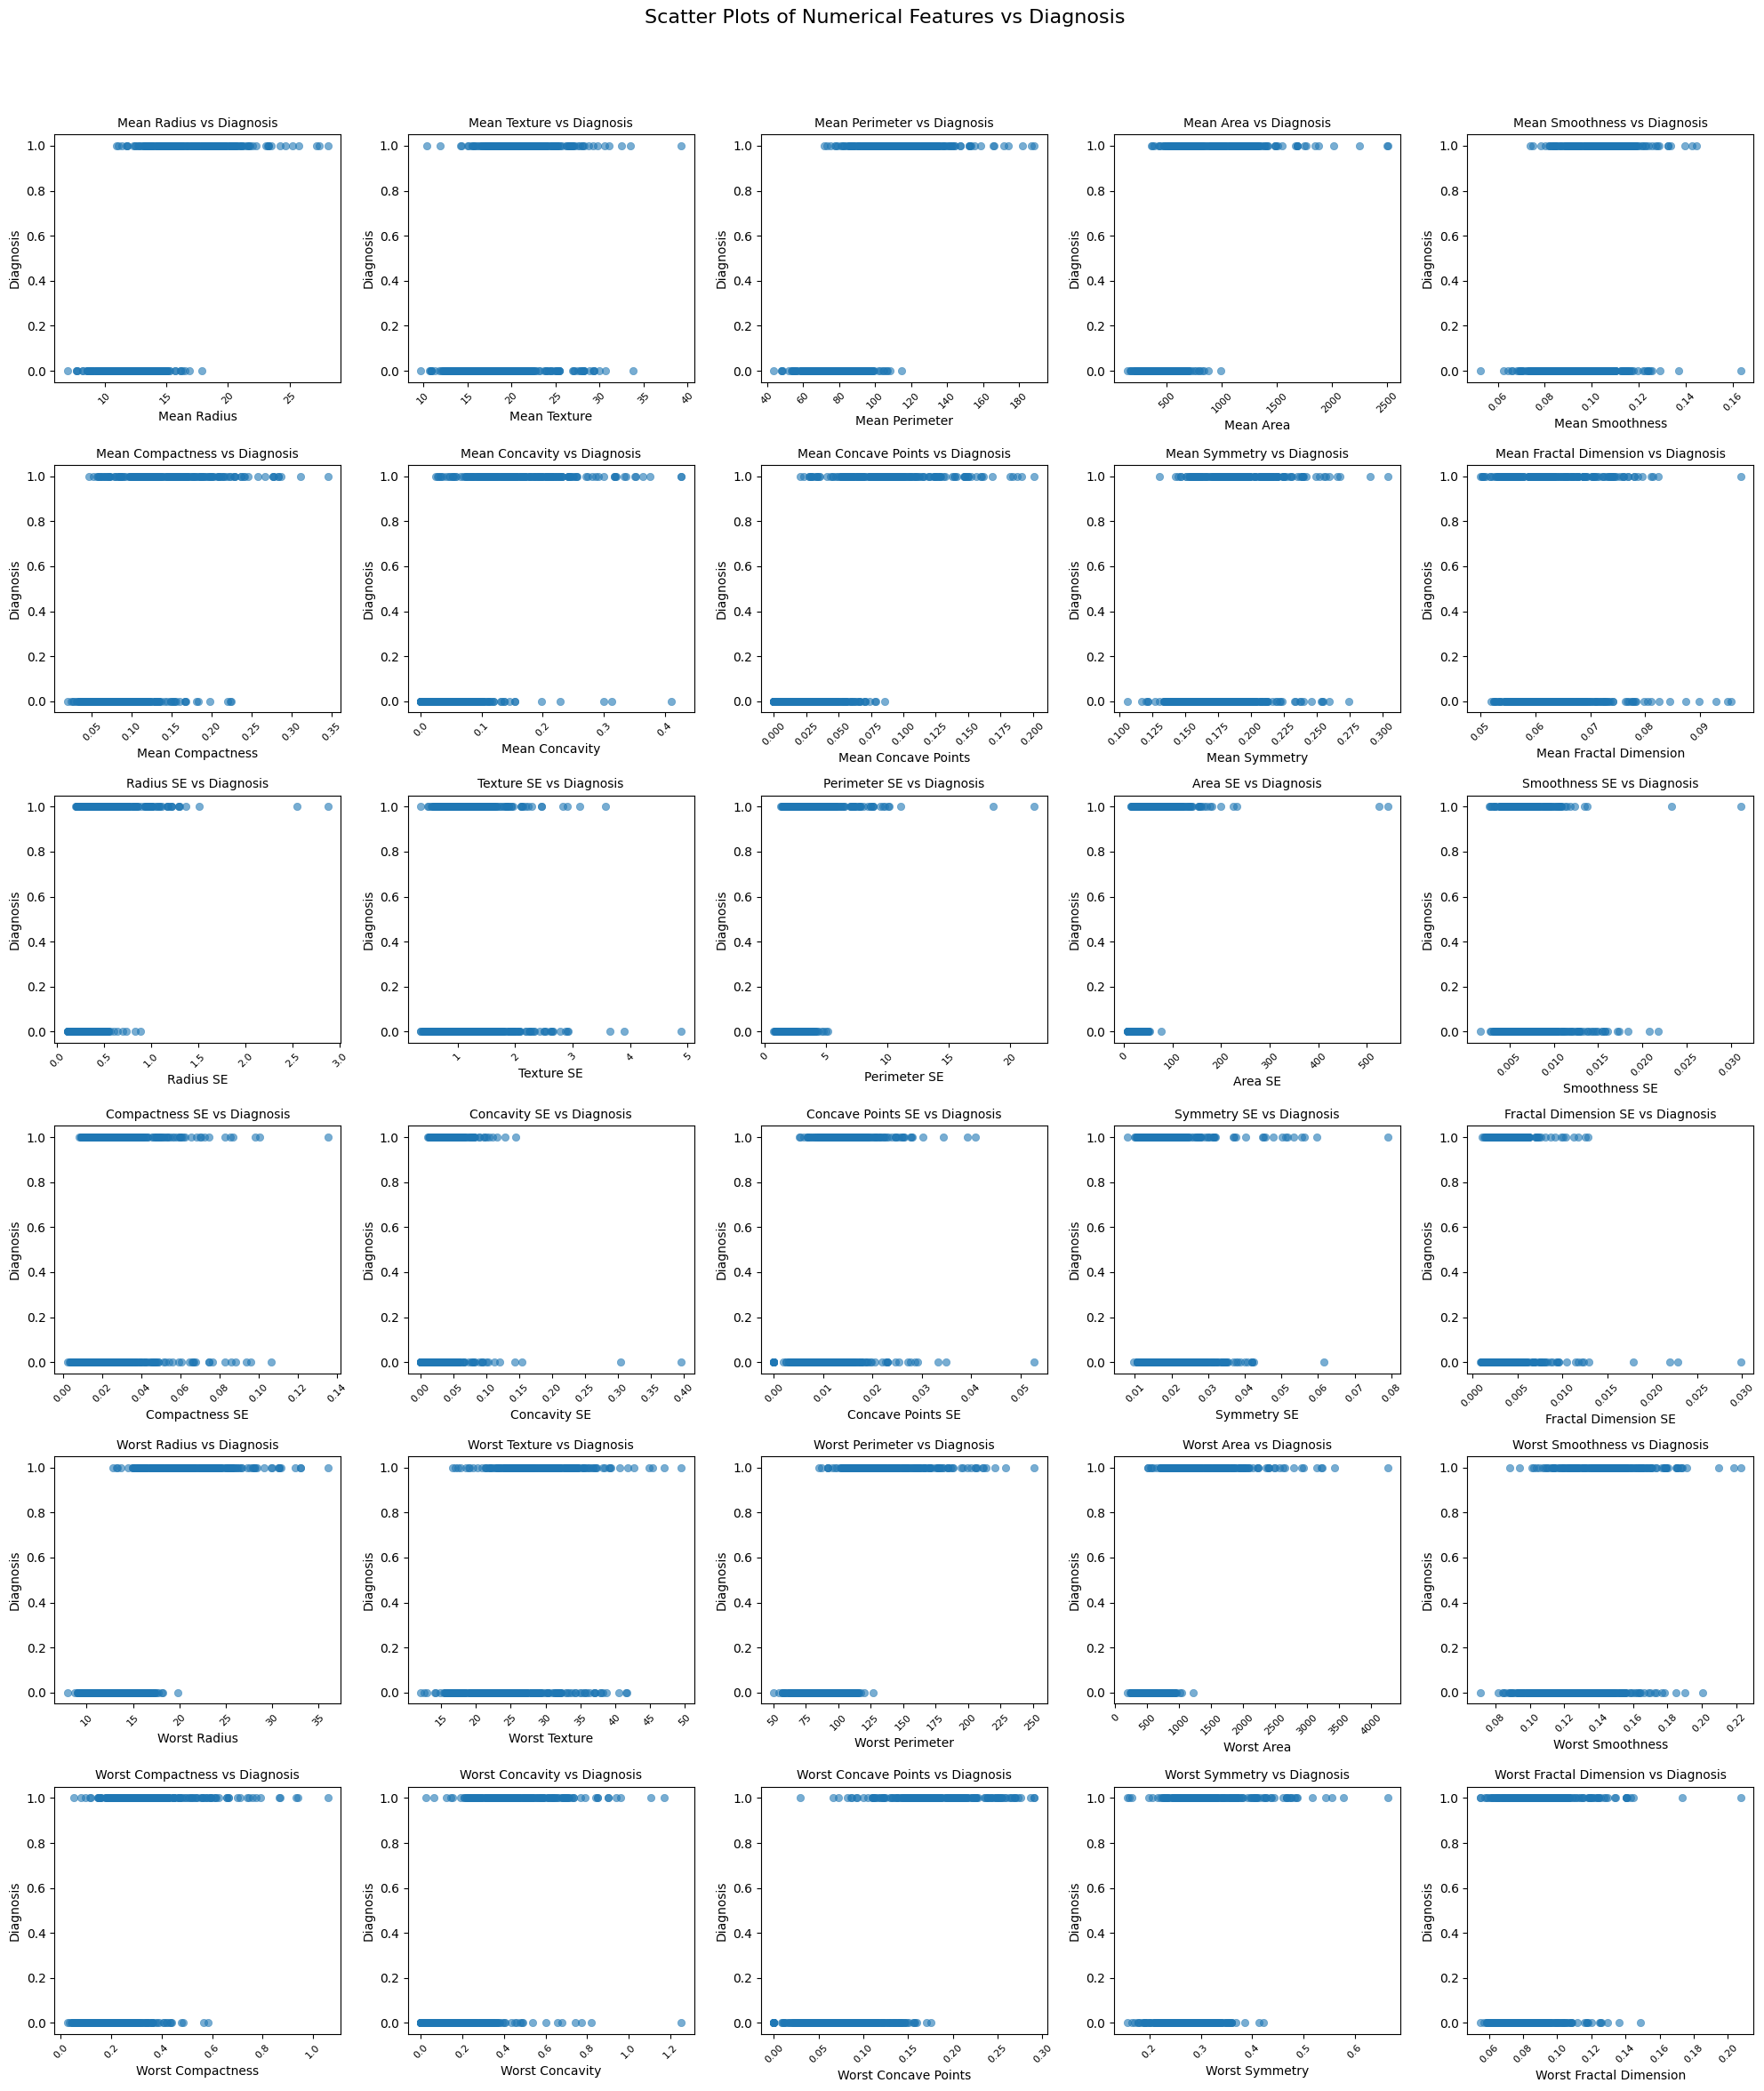

In [ ]:
# Columns to exclude
non_predictor_columns = ["ID", "Diagnosis"]

# Numeric feature columns (excluding ID and Diagnosis)
numeric_features = [col for col in column_names if col not in non_predictor_columns]

# Create a 6x5 grid of subplots for 30 features
fig, axs = plt.subplots(6, 5, figsize=(20, 24))
fig.suptitle('Scatter Plots of Numerical Features vs Diagnosis', fontsize=16)

# Plot each feature against the target variable (Diagnosis)
for idx, feature in enumerate(numeric_features):
    row, col = divmod(idx, 5)  # Calculate row and column in the 6x5 grid
    sns.scatterplot(
        x=df[feature], y=df["Diagnosis"], ax=axs[row, col], alpha=0.6, edgecolor=None
    )
    axs[row, col].set_title(f'{feature} vs Diagnosis', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=8)

# Adjust layout for better readability
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Class distribution density plots by feature

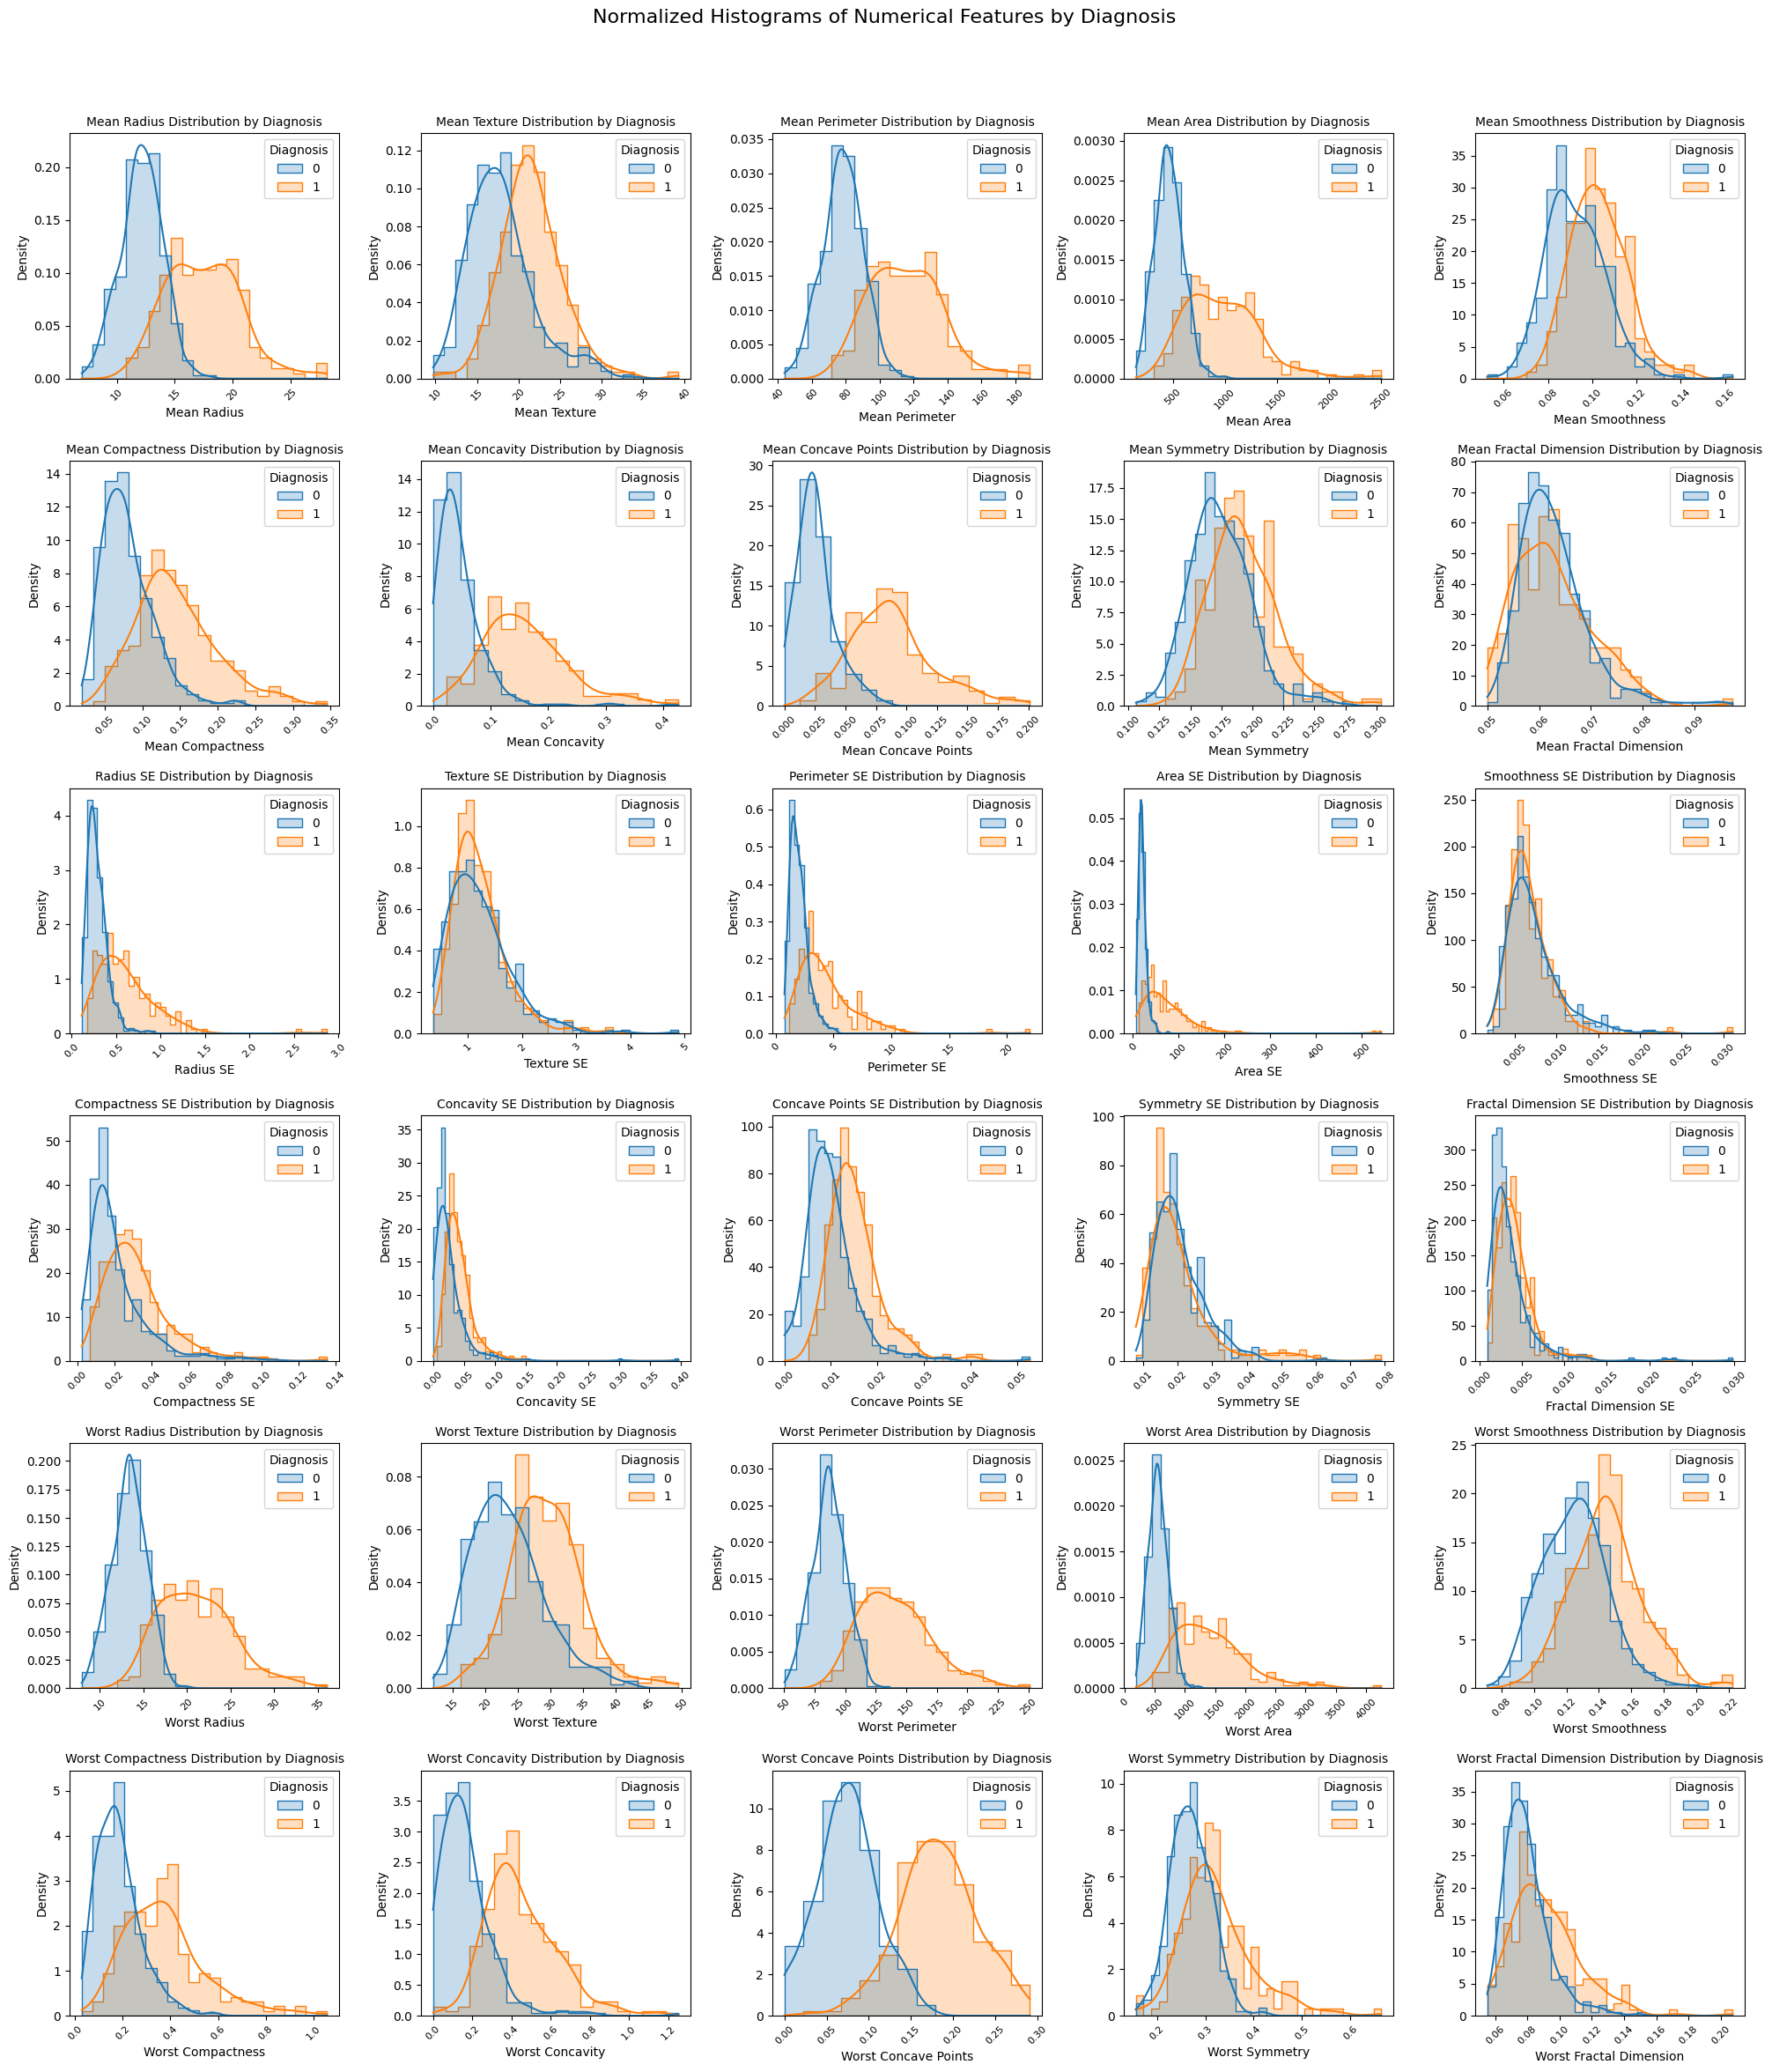

In [ ]:
# Columns to exclude
non_predictor_columns = ["ID", "Diagnosis"]

# Numeric feature columns (excluding ID and Diagnosis)
numeric_features = [col for col in column_names if col not in non_predictor_columns]

# Create a 6x5 grid of subplots for 30 features
fig, axs = plt.subplots(6, 5, figsize=(20, 24))
fig.suptitle('Normalized Histograms of Numerical Features by Diagnosis', fontsize=16)

# Plot normalized histograms for each feature, separated by Diagnosis
for idx, feature in enumerate(numeric_features):
    row, col = divmod(idx, 5)  # Calculate row and column in the 6x5 grid
    sns.histplot(
        data=df, x=feature, hue="Diagnosis", element="step",
        stat="density", common_norm=False, ax=axs[row, col], kde=True
    )
    axs[row, col].set_title(f'{feature} Distribution by Diagnosis', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=8)

# Adjust layout for better readability
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Normalized class distributions by feature

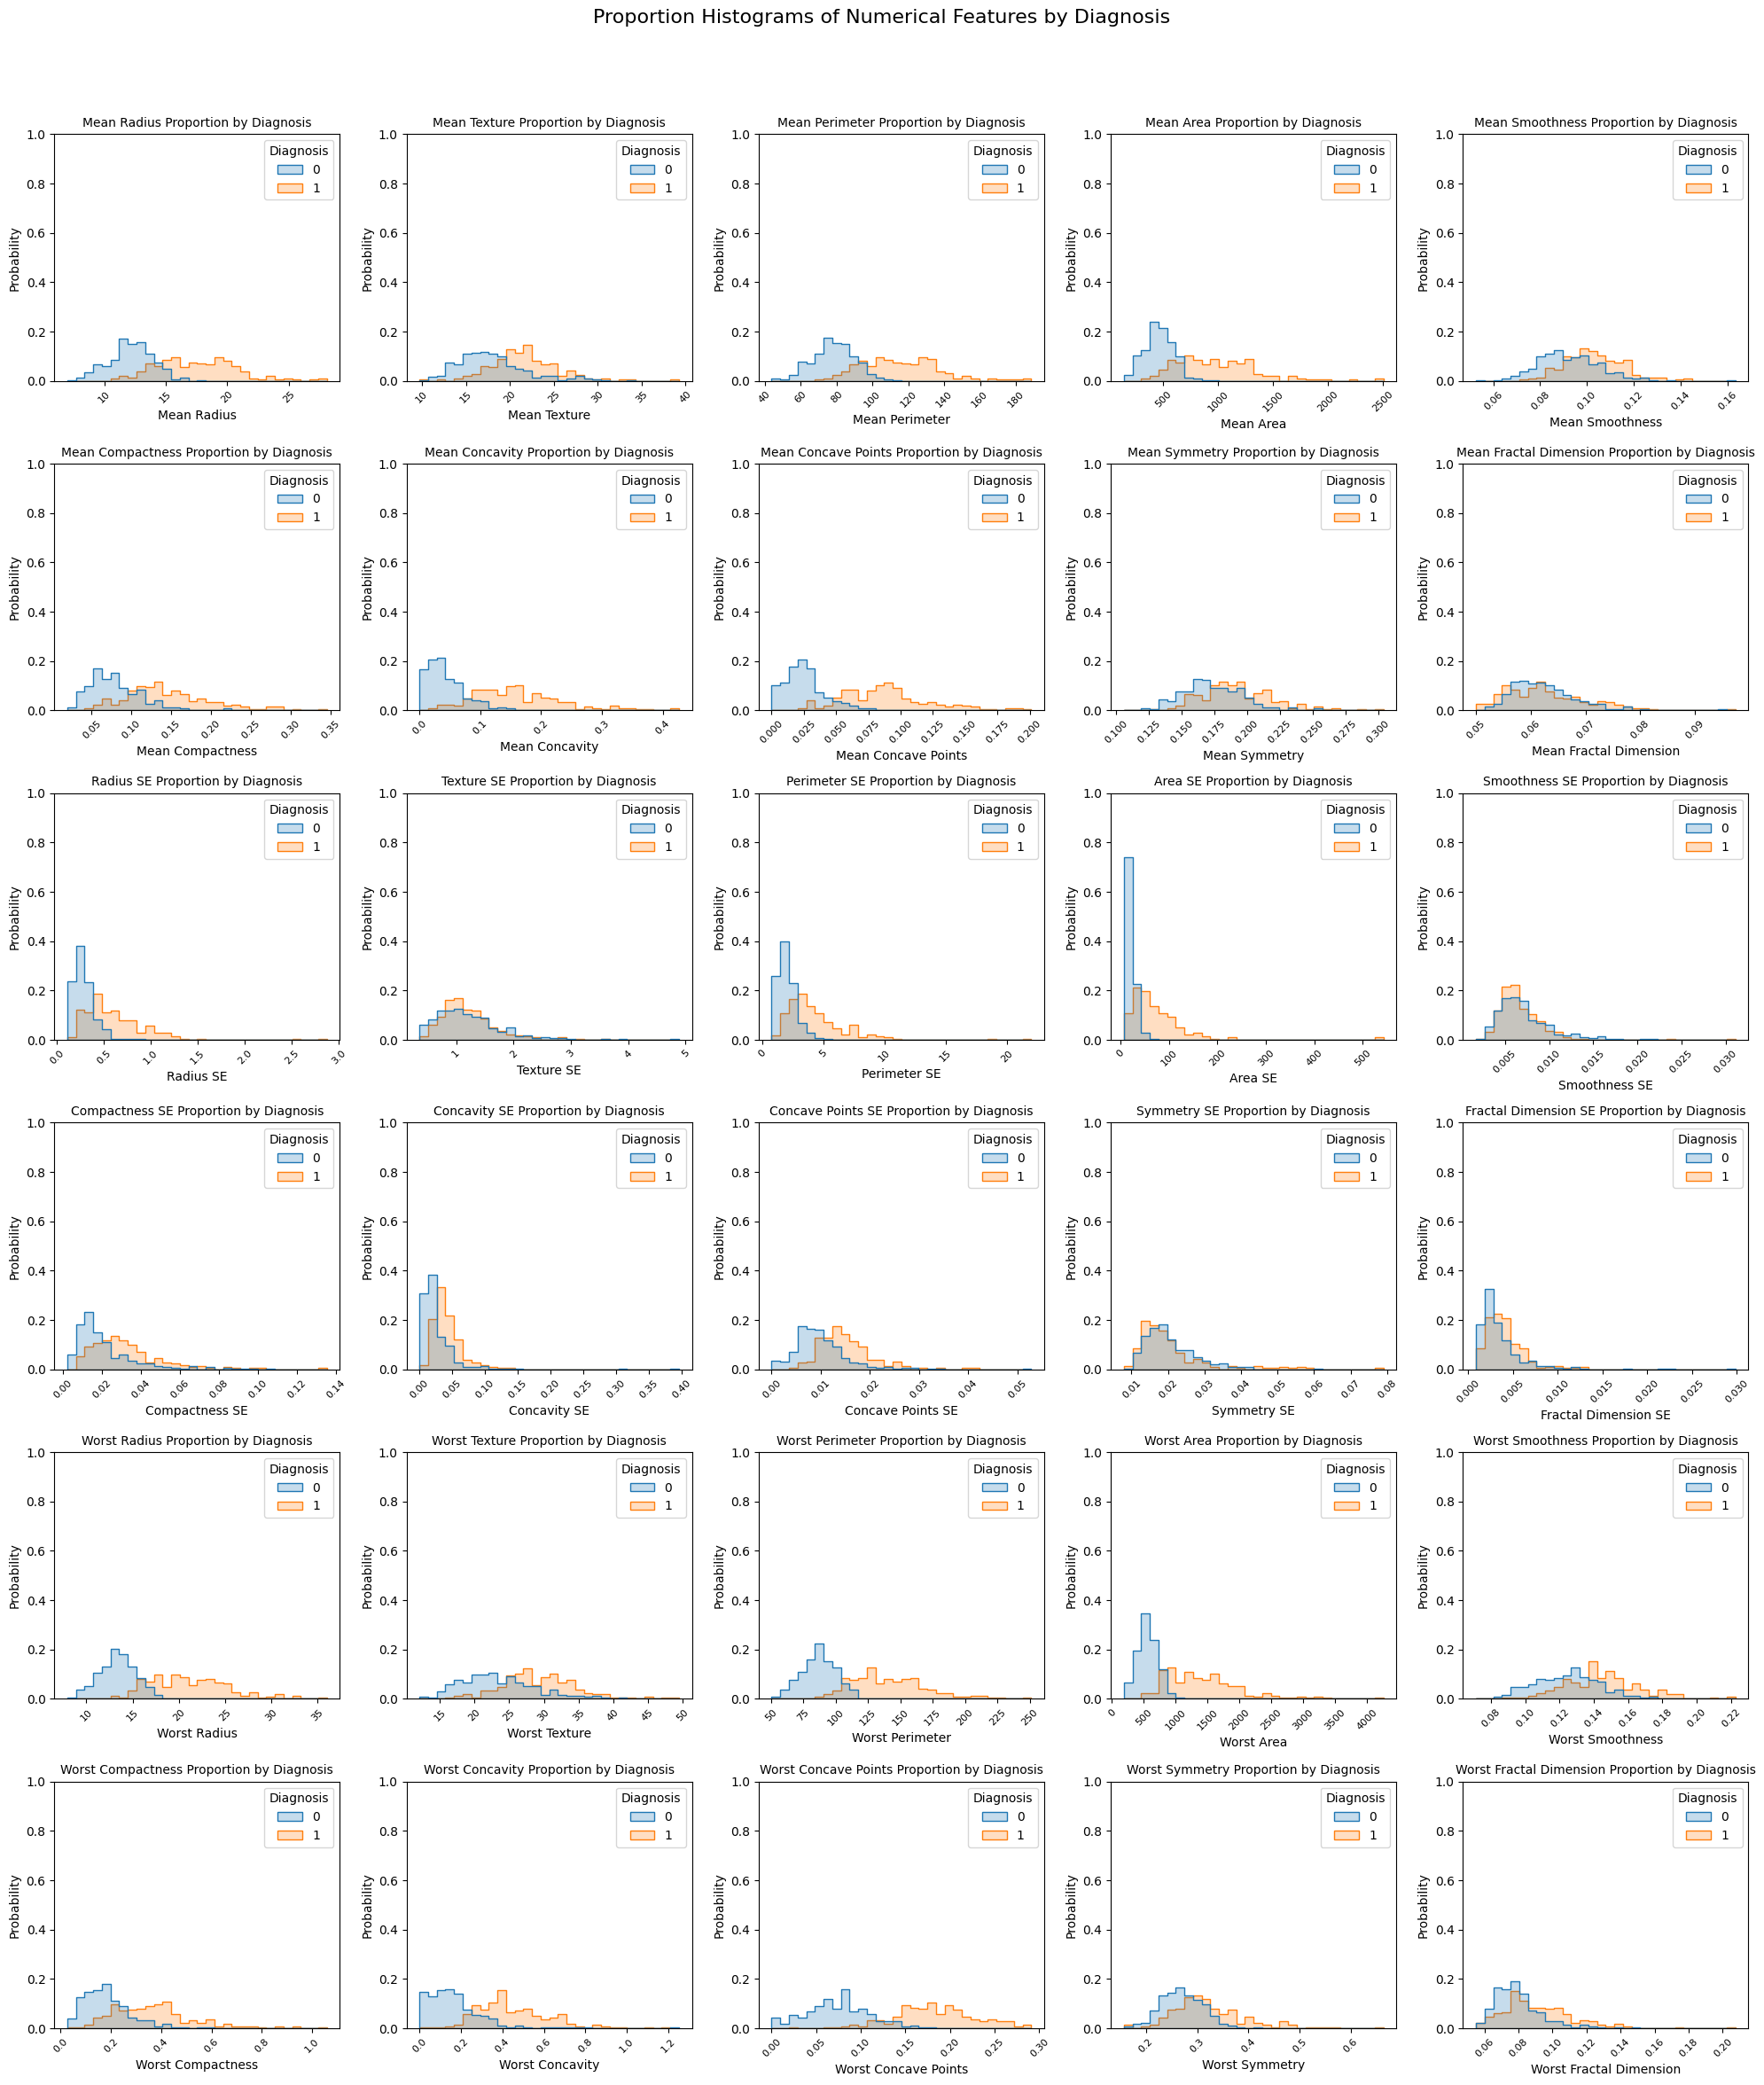

In [ ]:
# Columns to exclude
non_predictor_columns = ["ID", "Diagnosis"]

# Numeric feature columns (excluding ID and Diagnosis)
numeric_features = [col for col in column_names if col not in non_predictor_columns]

# Create a 6x5 grid of subplots for 30 features
fig, axs = plt.subplots(6, 5, figsize=(20, 24))
fig.suptitle('Proportion Histograms of Numerical Features by Diagnosis', fontsize=16)

# Plot histograms with proportions (probabilities) for each feature, separated by Diagnosis
for idx, feature in enumerate(numeric_features):
    row, col = divmod(idx, 5)  # Calculate row and column in the 6x5 grid
    sns.histplot(
        data=df, x=feature, hue="Diagnosis", element="step",
        stat="probability", common_norm=False, bins=30, ax=axs[row, col]
    )
    axs[row, col].set_title(f'{feature} Proportion by Diagnosis', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=8)
    axs[row, col].set_ylim(0, 1)  # Set y-axis to 0-1 for probability scale

# Adjust layout for better readability
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



## Cumulative Density Plots

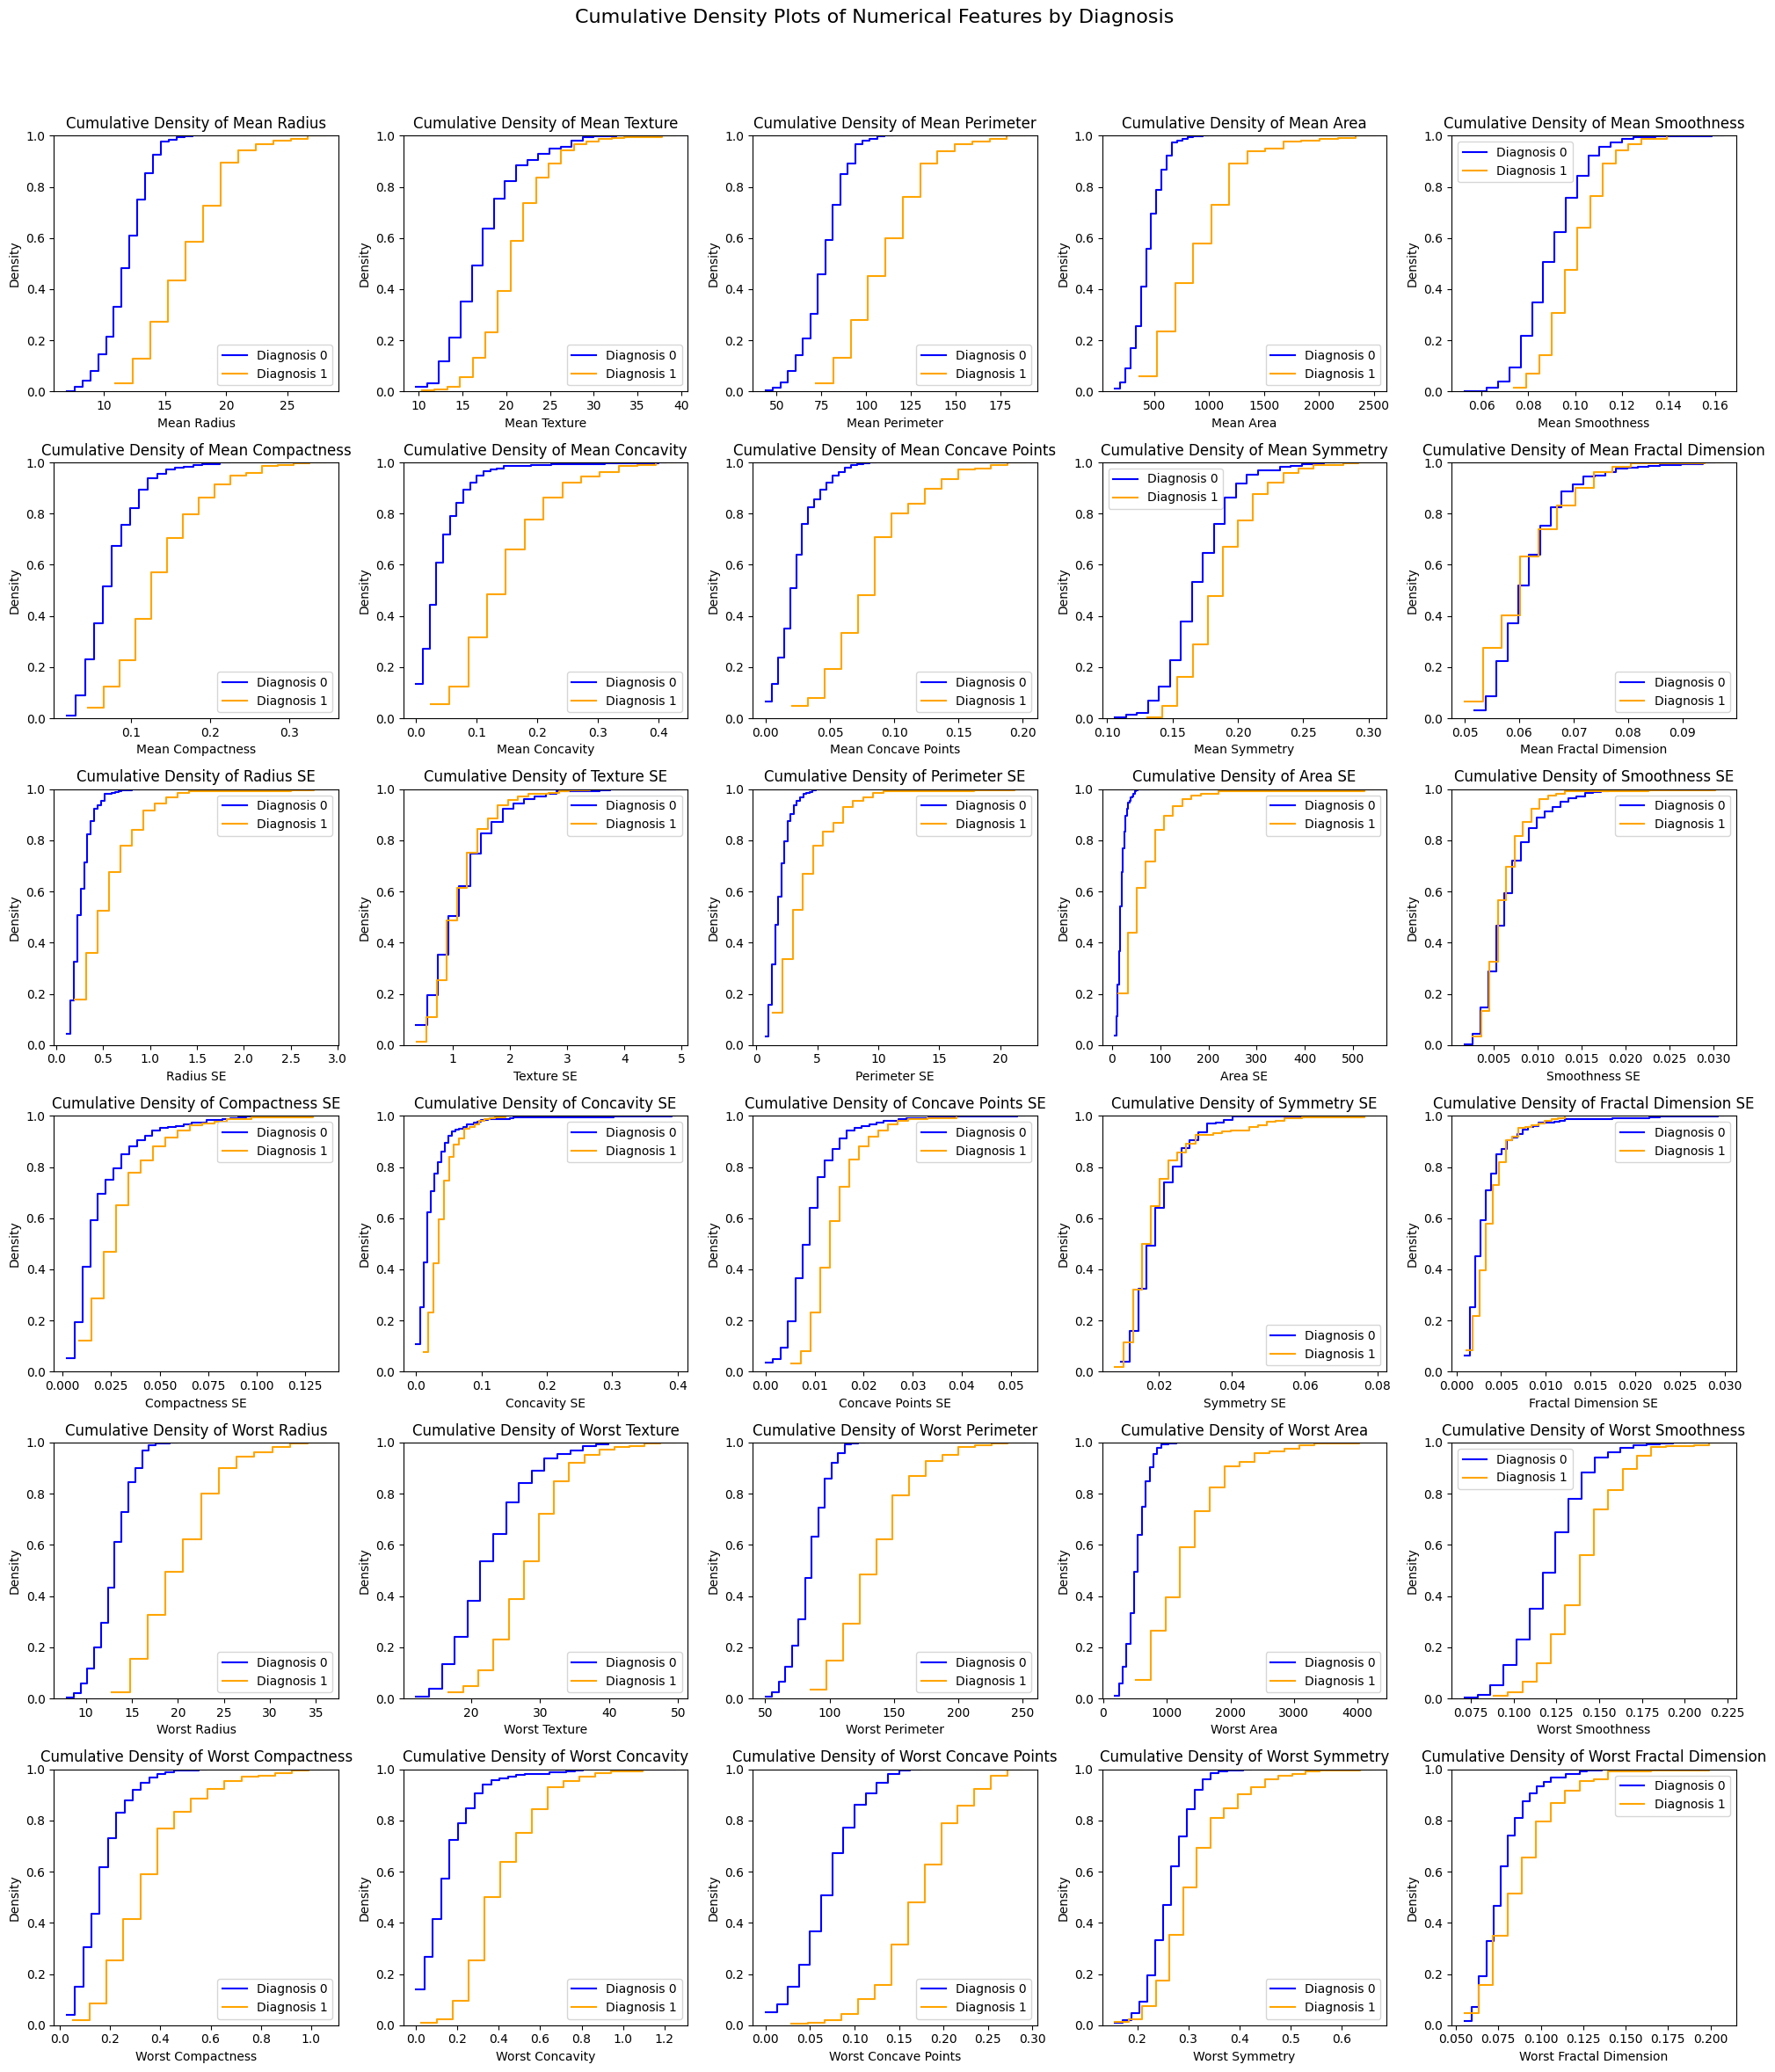

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(6, 5, figsize=(20, 24))
fig.suptitle('Cumulative Density Plots of Numerical Features by Diagnosis', fontsize=16)

# Plot CDF for each numeric feature
for idx, feature in enumerate(numeric_features):
    row, col = divmod(idx, 5)

    # Plot cumulative density for each class
    sns.histplot(data=df[df["Diagnosis"] == 0], x=feature, cumulative=True, stat="density",
                 element="step", fill=False, color="blue", ax=axs[row, col], label="Diagnosis 0")
    sns.histplot(data=df[df["Diagnosis"] == 1], x=feature, cumulative=True, stat="density",
                 element="step", fill=False, color="orange", ax=axs[row, col], label="Diagnosis 1")

    axs[row, col].set_title(f'Cumulative Density of {feature}')
    axs[row, col].legend()
    axs[row, col].set_ylim(0, 1)  # Ensuring y-axis is 0-1 for proportion scale

# Adjust layout
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Correlation Analysis

### Target Correlation

In [ ]:
# Columns to exclude
non_predictor_columns = ["ID", "Diagnosis"]

# Numeric feature columns (excluding ID and Diagnosis)
numeric_features = [col for col in column_names if col not in non_predictor_columns]

# Compute correlation between features and target 'Diagnosis'
correlation_table = df[numeric_features].corrwith(df['Diagnosis'])

# Sort by absolute value while preserving the sign
sorted_correlation_table = correlation_table.reindex(correlation_table.abs().sort_values(ascending=False).index)

# Display sorted correlation table
print("Sorted Feature Correlations with Diagnosis (by absolute magnitude):")
print(sorted_correlation_table)

Sorted Feature Correlations with Diagnosis (by absolute magnitude):
Worst Concave Points       0.793566
Worst Perimeter            0.782914
Mean Concave Points        0.776614
Worst Radius               0.776454
Mean Perimeter             0.742636
Worst Area                 0.733825
Mean Radius                0.730029
Mean Area                  0.708984
Mean Concavity             0.696360
Worst Concavity            0.659610
Mean Compactness           0.596534
Worst Compactness          0.590998
Radius SE                  0.567134
Perimeter SE               0.556141
Area SE                    0.548236
Worst Texture              0.456903
Worst Smoothness           0.421465
Worst Symmetry             0.416294
Mean Texture               0.415185
Concave Points SE          0.408042
Mean Smoothness            0.358560
Mean Symmetry              0.330499
Worst Fractal Dimension    0.323872
Compactness SE             0.292999
Concavity SE               0.253730
Fractal Dimension SE       0.077

### Feature Correlation

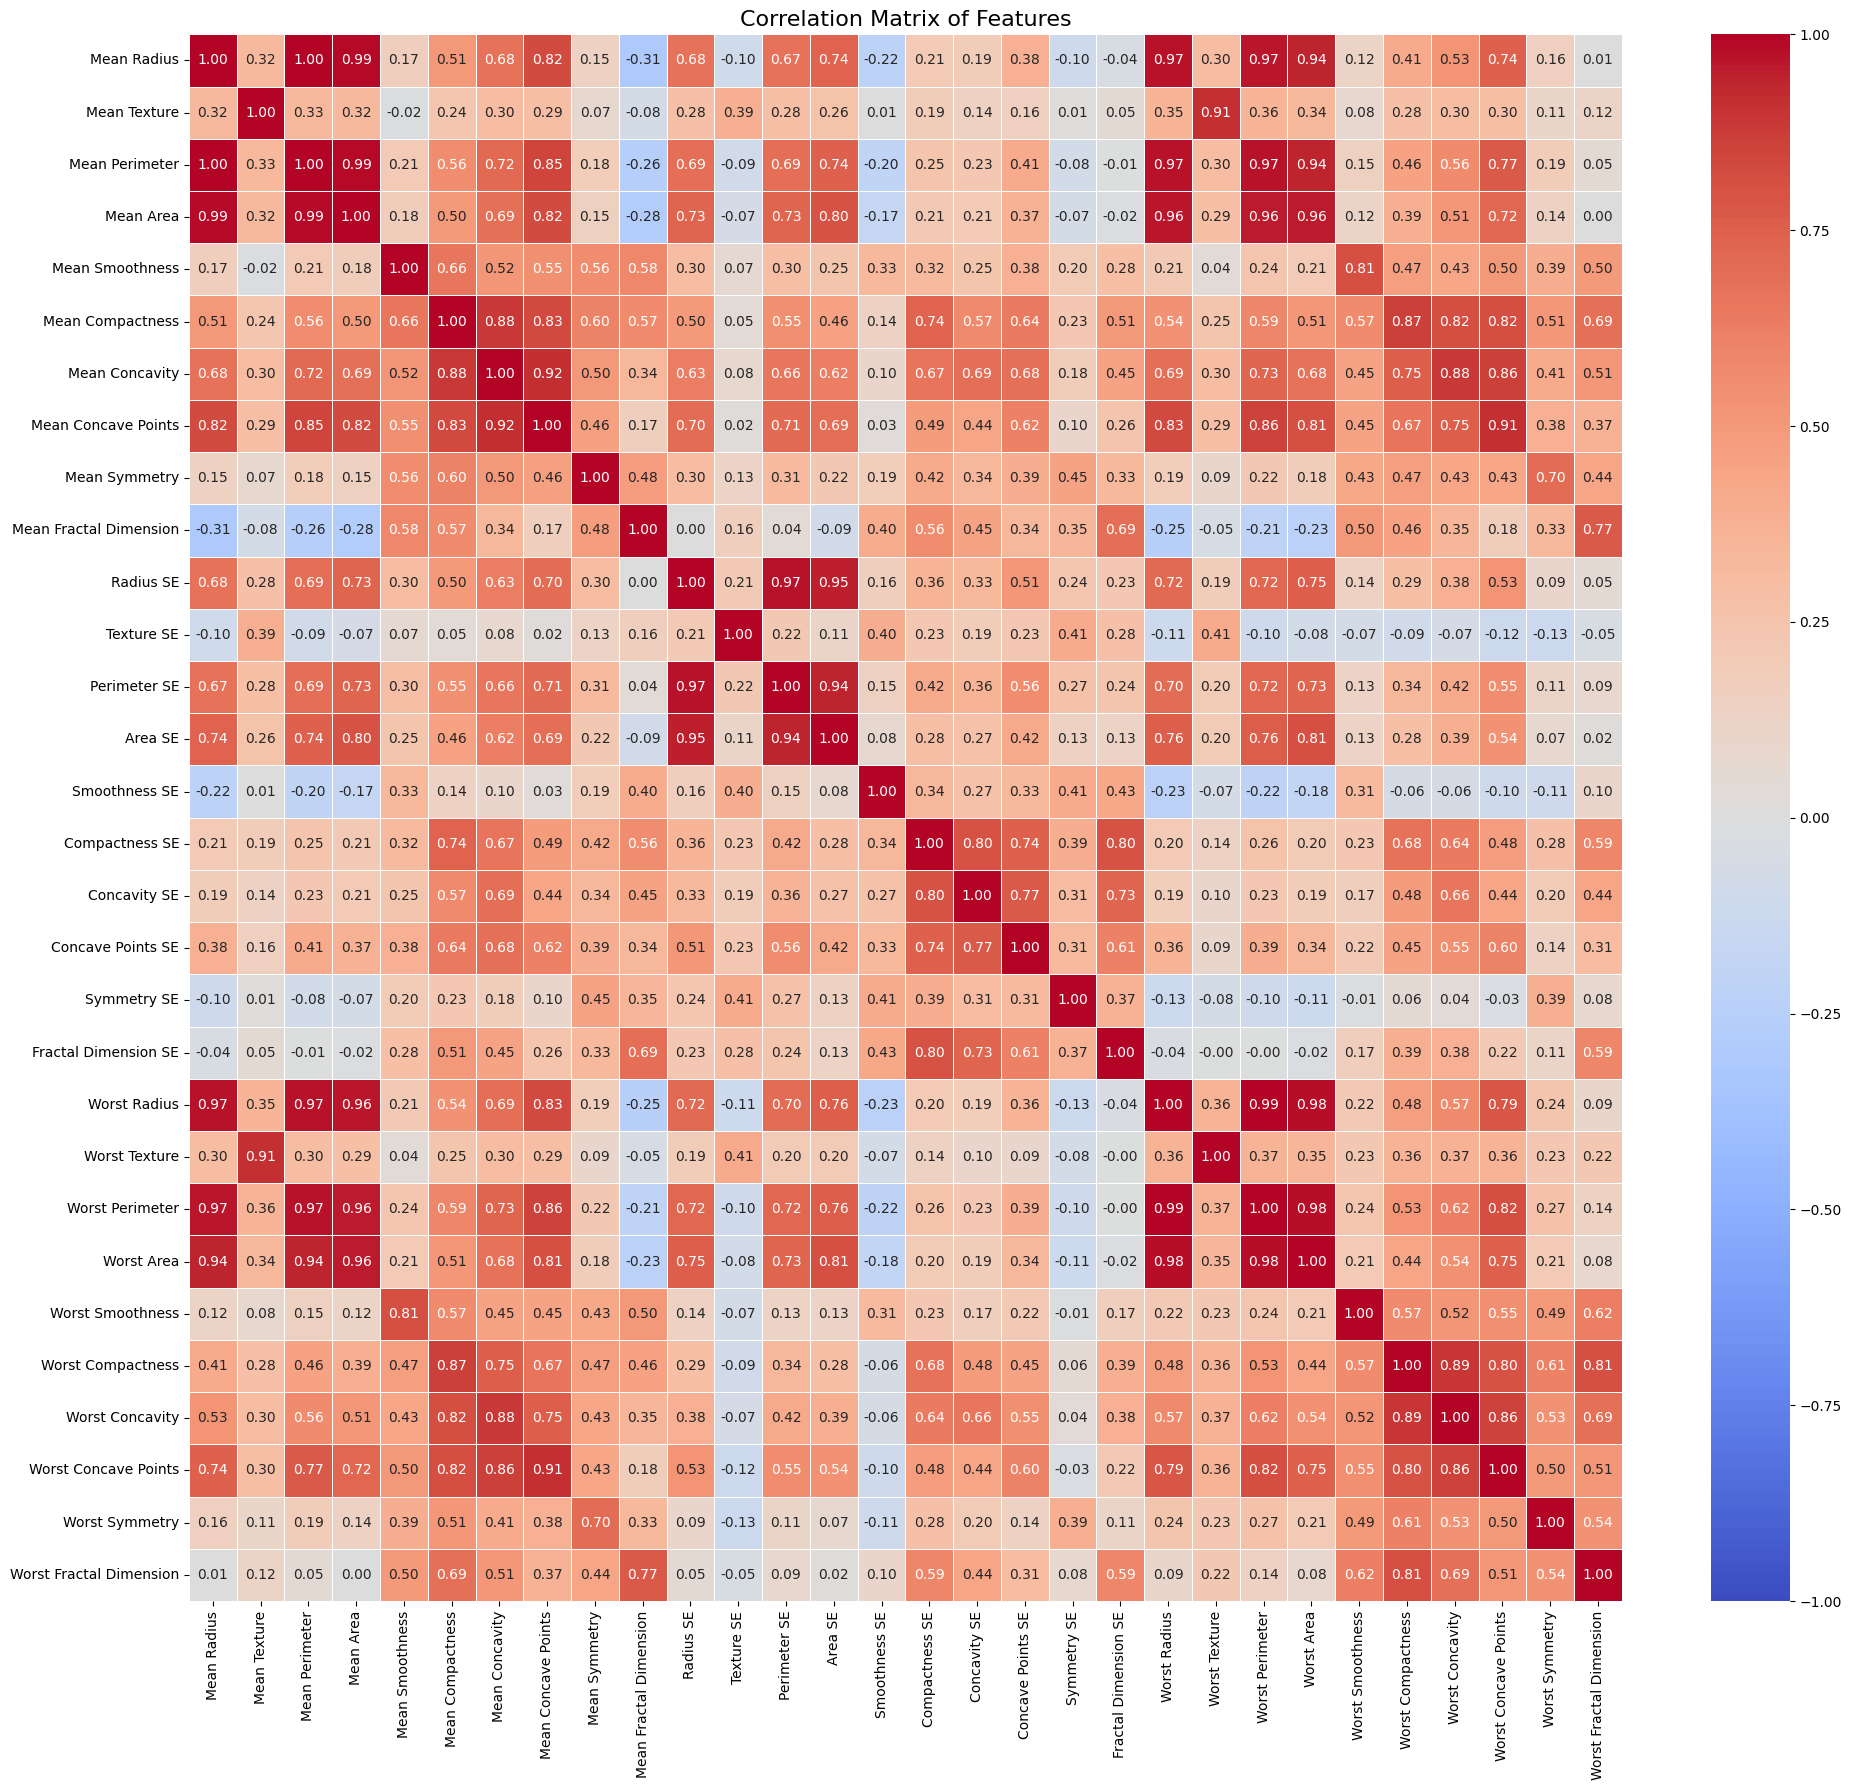

In [ ]:
# Compute the correlation matrix for all features (excluding the target)
correlation_matrix = df[numeric_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Set plot title and display
plt.title('Correlation Matrix of Features', fontsize=16)
plt.tight_layout()
plt.show()


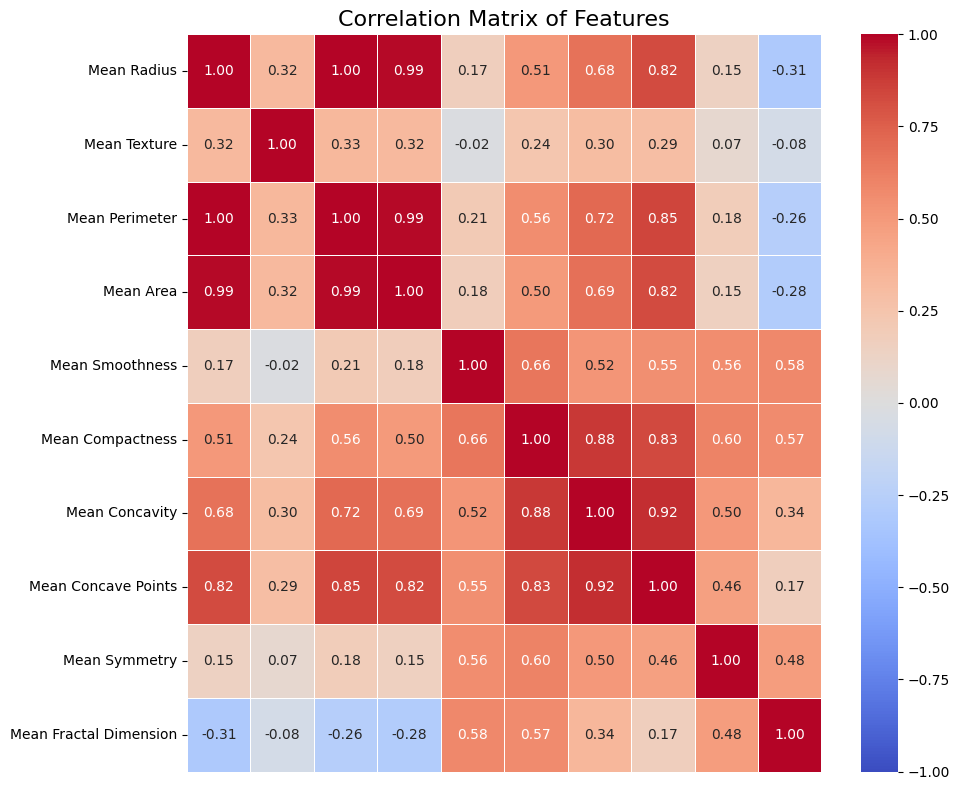

In [ ]:
# Compute the correlation matrix for all features (excluding the target)
correlation_matrix_mean = df[numeric_features].iloc[:, :10].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_mean, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Set plot title and display
plt.title('Correlation Matrix of Features', fontsize=16)
plt.gca().xaxis.set_visible(False)
plt.tight_layout()
plt.show()

## Outlier analysis

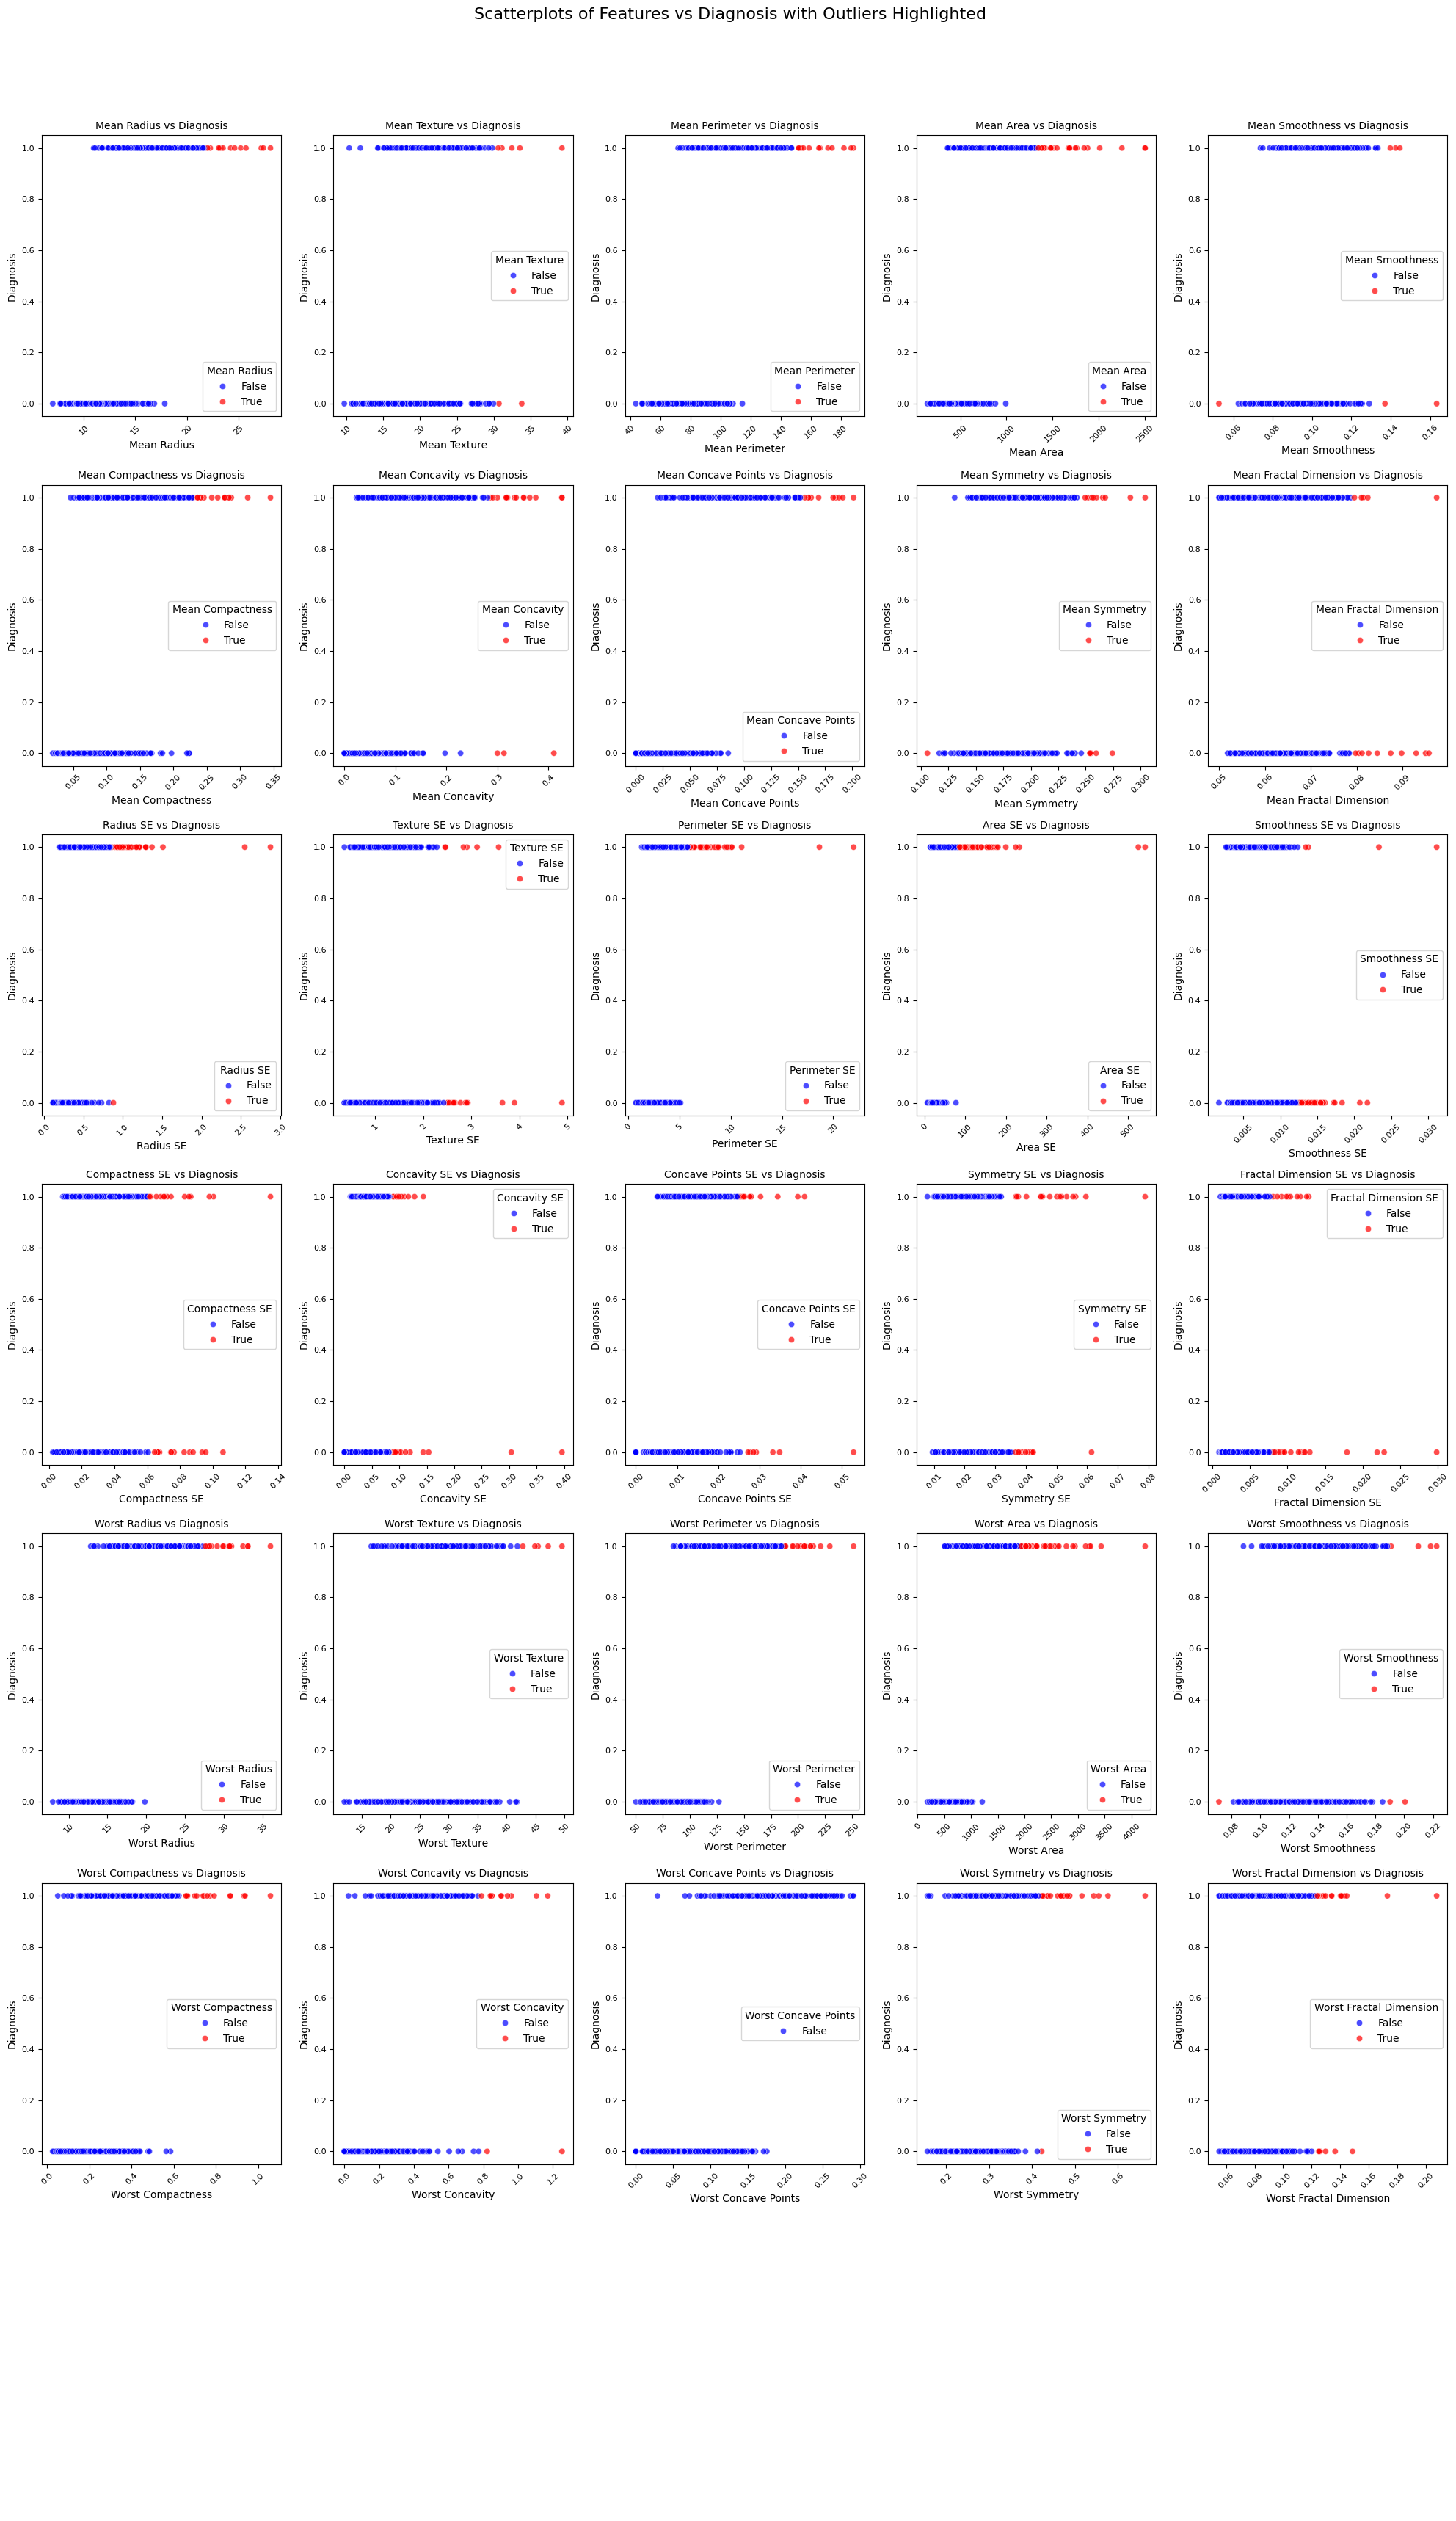

                    Feature  Percentage of Outliers
13                  Area SE               11.423550
10                Radius SE                6.678383
12             Perimeter SE                6.678383
23               Worst Area                6.151142
14            Smoothness SE                5.272408
15           Compactness SE                4.920914
19     Fractal Dimension SE                4.920914
18              Symmetry SE                4.745167
3                 Mean Area                4.393673
29  Worst Fractal Dimension                4.217926
28           Worst Symmetry                4.042179
16             Concavity SE                3.866432
11               Texture SE                3.514938
17        Concave Points SE                3.339192
6            Mean Concavity                3.163445
20             Worst Radius                2.987698
25        Worst Compactness                2.811951
5          Mean Compactness                2.811951
22          

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Number of rows and columns for subplots
n_cols = 5
n_rows = (len(numeric_features) // n_cols) + 1  # Calculate the number of rows needed

# Create a subplot grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle('Scatterplots of Features vs Diagnosis with Outliers Highlighted', fontsize=16)

# Flatten the axes array to make it easier to iterate
axs = axs.flatten()

outlier_summary = []

# Iterate through all numeric features
for idx, feature in enumerate(numeric_features):
    # Calculate the first and third quartiles (Q1, Q3) and the IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Detect outliers using the IQR method
    outliers = (df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))

    # Calculate the percentage of outliers
    outlier_percentage = outliers.mean() * 100  # Convert to percentage

    # Add the result to the summary table
    outlier_summary.append([feature, outlier_percentage])

    # Create a scatterplot in the corresponding subplot
    sns.scatterplot(x=df[feature], y=df['Diagnosis'], hue=outliers, palette={True: 'red', False: 'blue'}, alpha=0.7, ax=axs[idx])
    axs[idx].set_title(f'{feature} vs Diagnosis', fontsize=10)
    axs[idx].set_xlabel(feature)
    axs[idx].set_ylabel('Diagnosis')

    # Hide ticks for better readability if there are too many subplots
    axs[idx].tick_params(axis='x', rotation=45, labelsize=8)
    axs[idx].tick_params(axis='y', labelsize=8)

# Hide any unused subplots if the number of numeric features doesn't fill the grid
for j in range(idx + 1, len(axs)):
    axs[j].axis('off')

# Adjust layout for better readability
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Create a DataFrame to display the summary of outliers for each feature
outlier_df = pd.DataFrame(outlier_summary, columns=['Feature', 'Percentage of Outliers'])

# Sort the table by percentage of outliers in descending order
outlier_df_sorted = outlier_df.sort_values(by='Percentage of Outliers', ascending=False)

# Print the table
print(outlier_df_sorted)


# Cleaning and sampling

## Missing values check

In [ ]:
df.isnull().values.any()

False

## Sampling and standardization

In [ ]:
# Create train, validation, and test splits (60%, 20%, 20%)
# Split the dataset into features and labels
df_X = df.drop(columns=['ID', 'Diagnosis'])
df_y = df['Diagnosis']

X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_y, train_size=0.8, test_size=0.2, stratify=df_y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, train_size=0.75, test_size=0.25, stratify=y_dev, random_state=42)

print("X_train.shape: ", X_train.shape)
print("X_val.shape: ", X_val.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_val.shape: ", y_val.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (341, 30)
X_val.shape:  (114, 30)
X_test.shape:  (114, 30)
y_train.shape:  (341,)
y_val.shape:  (114,)
y_test.shape:  (114,)


In [ ]:
scaler = StandardScaler()

X_train_standardized = scaler.fit_transform(X_train)
X_train_standardized = pd.DataFrame(X_train_standardized, columns=numeric_features, index=X_train.index)

X_val_standardized = scaler.transform(X_val)
X_val_standardized = pd.DataFrame(X_val_standardized, columns=numeric_features, index=X_val.index)

X_test_standardized = scaler.transform(X_test)
X_test_standardized = pd.DataFrame(X_test_standardized, columns=numeric_features, index=X_test.index)

print("X_train_standardized: ", X_train_standardized.describe())
print("X_val_standardized: ", X_val_standardized.describe())
print("X_test_standardized: ", X_test_standardized.describe())

X_train_standardized:          Mean Radius  Mean Texture  Mean Perimeter     Mean Area  \
count  3.410000e+02  3.410000e+02    3.410000e+02  3.410000e+02   
mean   2.318120e-16 -2.083703e-16    2.604629e-17 -1.354407e-16   
std    1.001470e+00  1.001470e+00    1.001470e+00  1.001470e+00   
min   -1.998426e+00 -2.231757e+00   -1.949234e+00 -1.435681e+00   
25%   -6.937654e-01 -6.978038e-01   -7.047398e-01 -6.744411e-01   
50%   -2.291070e-01 -1.214231e-01   -2.446517e-01 -3.020258e-01   
75%    5.499610e-01  5.605892e-01    5.490205e-01  4.174952e-01   
max    3.688492e+00  4.558513e+00    3.816371e+00  5.121221e+00   

       Mean Smoothness  Mean Compactness  Mean Concavity  Mean Concave Points  \
count     3.410000e+02      3.410000e+02    3.410000e+02         3.410000e+02   
mean      7.761794e-16     -5.209258e-17    6.251109e-17         6.772035e-17   
std       1.001470e+00      1.001470e+00    1.001470e+00         1.001470e+00   
min      -2.200891e+00     -1.497420e+00   -1.106

# Non Essemble methods

### Logistic Regression


In [ ]:
#Non tuned Logistic Regression
BaseLR = LogisticRegression(random_state = 42)
BaseLR.fit(X_train_standardized,y_train)
train_pred = BaseLR.predict(X_train_standardized)
val_pred = BaseLR.predict(X_val_standardized)
test_pred = BaseLR.predict(X_test_standardized)
print(f1_score(y_train,train_pred),"is the f1 score on the train set without tuning")
print(f1_score(y_val,val_pred),"is the f1 score on the val set without tuning")
print(f1_score(y_test,test_pred),"is the f1 score on the test set without tuning")

0.984 is the f1 score on the train set without tuning
0.9655172413793104 is the f1 score on the val set without tuning
0.963855421686747 is the f1 score on the test set without tuning


In [ ]:
#Hyperparameter tuning
param_grid = {
    'C': np.logspace(-4, 0),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

TempLR = LogisticRegression(random_state = 42)
strat = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(
    TempLR, param_grid, cv=strat, scoring='f1', verbose=1
)
#Tuned results
grid_search.fit(X_train_standardized,y_train)
print(grid_search.best_params_)
print(grid_search.score(X_val_standardized,y_val),"is the f1 score on the val set with tuning")
print(grid_search.score(X_test_standardized,y_test),"is the f1 score on the test set with tuning")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 0.07196856730011514, 'penalty': 'l2', 'solver': 'liblinear'}
0.9761904761904762 is the f1 score on the val set with tuning
0.975609756097561 is the f1 score on the test set with tuning


[Text(0, 0.5, 'Importance Standardized (0,1)')]

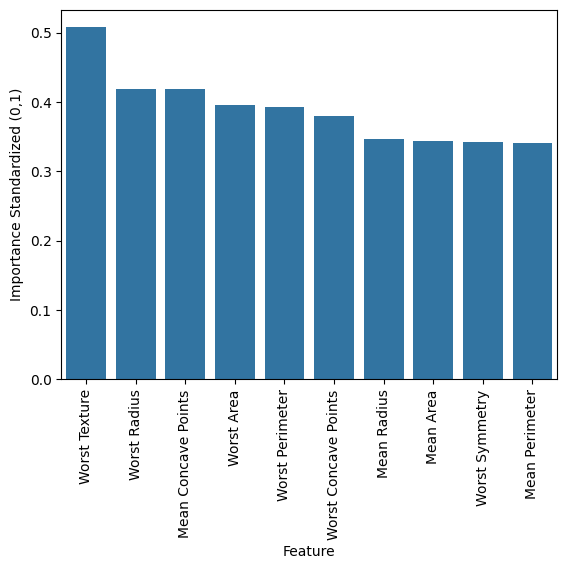

In [ ]:
#Most important features
BestLR = LogisticRegression(random_state= 42, C = grid_search.best_params_['C'], penalty = grid_search.best_params_['penalty'], solver = grid_search.best_params_['solver'])
BestLR.fit(X_train_standardized,y_train)
LR_top_10_feature = pd.DataFrame({'Feature':X_train_standardized.columns,'Importance':abs(BestLR.coef_[0])})
LR_top_10_feature = LR_top_10_feature.sort_values(by='Importance', ascending=False).head(10)
ax = sns.barplot(data=LR_top_10_feature,x="Feature",y="Importance")
ax.tick_params(axis = 'x',rotation = 90)
ax.set(ylabel = "Importance Standardized (0,1)")

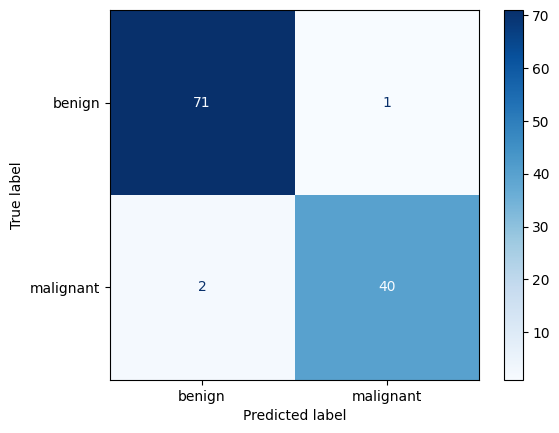

In [ ]:
cm = confusion_matrix(y_test, test_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['benign','malignant'])
disp.plot(cmap='Blues')

plt.show()

### Decision Tree

In [ ]:
#Nontuned Decision Tree
BaseTree = DecisionTreeClassifier(criterion = "entropy",random_state = 42)
BaseTree.fit(X_train_standardized,y_train)
train_pred = BaseTree.predict(X_train_standardized)
val_pred = BaseTree.predict(X_val_standardized)
test_pred = BaseTree.predict(X_test_standardized)
print(f1_score(y_train,train_pred),"is the f1 score on the train set without tuning")
print(f1_score(y_val,val_pred),"is the f1 score on the val set without tuning")
print(f1_score(y_test,test_pred),"is the f1 score on the test set without tuning")

1.0 is the f1 score on the train set without tuning
0.9032258064516129 is the f1 score on the val set without tuning
0.9024390243902439 is the f1 score on the test set without tuning


In [ ]:
#Hyperparameter tuning for the decision tree
max_depth = [x for x in range(1,16)]
best_score = []
path = BaseTree.cost_complexity_pruning_path(X_train_standardized,y_train).ccp_alphas
for ccp in path:
  for dep in max_depth:
    TempTree = DecisionTreeClassifier(random_state=42,ccp_alpha = ccp,max_depth=dep,criterion = "entropy")
    TempTree.fit(X_train_standardized,y_train)
    val_pred = TempTree.predict(X_val_standardized)
    valscore = f1_score(y_val,val_pred)
    best_score.append((valscore,dep,ccp))
best_score.sort(reverse=True)

best_params = best_score[0]
BestTree = DecisionTreeClassifier(random_state=42,ccp_alpha = best_params[-1],max_depth = best_params[1],criterion = "entropy")
BestTree.fit(X_train_standardized,y_train)
test_pred = BestTree.predict(X_test_standardized)
testscore = f1_score(y_test,test_pred)
print(testscore,"is the f1 score on the test set with the tuned tree")



0.925 is the f1 score on the test set with the tuned tree


Alpha = 0.01797 consistently provides the best results regardless of depth. Also marginal improvements with increasing the max_depth


[Text(0, 0.5, 'Importance Standardized (0,1)')]

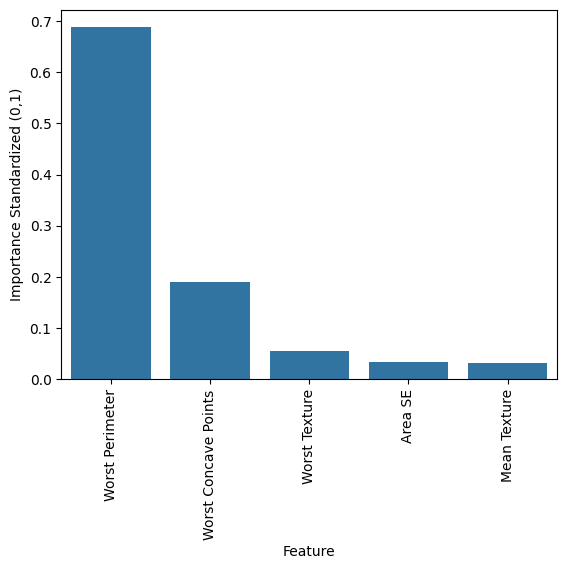

In [ ]:
importance = BestTree.feature_importances_
Tree_top_5_feature = pd.DataFrame({'Feature':X_train_standardized.columns,'Importance':importance})
Tree_top_5_feature = Tree_top_5_feature.sort_values(by='Importance', ascending=False).head(5)
ax = sns.barplot(data=Tree_top_5_feature,x="Feature",y="Importance")
ax.tick_params(axis = 'x',rotation = 90)
ax.set(ylabel = "Importance Standardized (0,1)")

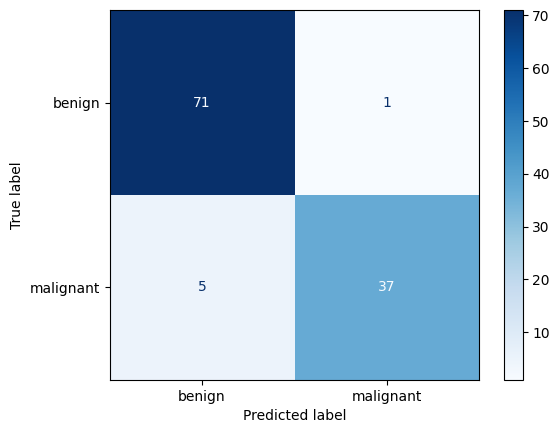

In [ ]:
cm = confusion_matrix(y_test, test_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['benign','malignant'])
disp.plot(cmap='Blues')

plt.show()

# Essemble Methods


### Random Forest

In [ ]:
# Step 3: Train the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Step 4: Evaluate the model
y_val_pred = rfc.predict(X_val)
y_test_pred = rfc.predict(X_test)

val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

val_report = classification_report(y_val, y_val_pred)
test_report = classification_report(y_test, y_test_pred)

# Print results
print("Validation Accuracy:", val_accuracy)
print("Validation set F-1 score:", f1_score(y_val, y_val_pred))
print("Validation Classification Report:\n", val_report)
print("Test Accuracy:", test_accuracy)
print('Test set F-1 score', f1_score(y_test, y_test_pred))
print("Test Classification Report:\n", test_report)

Validation Accuracy: 0.9736842105263158
Validation set F-1 score: 0.9647058823529412
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Test Accuracy: 0.956140350877193
Test set F-1 score 0.9382716049382716
Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# Defining the range of hyperparameters
n_est_choices = [50, 100, 200, 300, 400]
max_depth_choices = [None, 5, 10, 15, 20]

rfc_list = []
errors = []

for n_est in n_est_choices:
    for max_d in max_depth_choices:
        # Train the Random Forest with OOB enabled
        rfc = RandomForestClassifier(n_estimators=n_est, max_depth=max_d, oob_score=True, random_state=42)
        rfc.fit(X_dev, y_dev)

        oob_error = 1 - rfc.oob_score_
        errors.append(oob_error)
        rfc_list.append(rfc)

# Identify the model with the lowest OOB error
best_rfc = rfc_list[np.argmin(errors)]

# Predictions and performance evaluation
y_pred_val = best_rfc.predict(X_val)
y_pred_test = best_rfc.predict(X_test)

val_accuracy = accuracy_score(y_val, y_pred_val)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Optimal n_estimators: ", best_rfc.get_params()['n_estimators'])
print("Optimal max_depth: ", best_rfc.get_params()['max_depth'])
print("Validation accuracy: ", val_accuracy)
print("Validation set F-1 score: ", f1_score(y_val, y_pred_val))
print("Optimized test accuracy: ", test_accuracy)
print("Optimized test set F-1 score: ", f1_score(y_test, y_pred_test))

Optimal n_estimators:  100
Optimal max_depth:  None
Validation accuracy:  1.0
Validation set F-1 score:  1.0
Optimized test accuracy:  0.9736842105263158
Optimized test set F-1 score:  0.9629629629629629


To improve the performance of our initial random forest model, we chose to perform hyperparameter tuning on the number of trees in the random forest (n_estimators) as well as the maximum depth of each tree (max_depth).

We performed model selection using the chosen values for the hyperparameters, which we determined through gauging appropriate values based on previous analysis and based on the size of this specific dataset. We used out-of-bag (OOB) error for evaluating and selecting the optimal hyperparameters.

Increasing the model complexity proved quite effective: The validation accuracy and validation set F-1 score increased by 0.026 and 0.035, respectively, compared to the vanilla Random Forest model. Similarly, the test set accuracy and test set F1-score increased by 0.0175 and 0.025, respectively compared to the vanilla model.

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

# Train the initial untuned XGBoost model
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = xgb_clf.predict(X_val)
y_test_pred = xgb_clf.predict(X_test)

# Validation metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='binary')
val_recall = recall_score(y_val, y_val_pred, average='binary')
val_report = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("Validation set F-1 score:", val_f1)
print("Validation Precision (overall):", val_precision)
print("Validation Recall (overall):", val_recall)
print("Validation Classification Report:\n", val_report)

# Test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='binary')
test_recall = recall_score(y_test, y_test_pred, average='binary')
test_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test set F-1 score:", test_f1)
print("Test Precision (overall):", test_precision)
print("Test Recall (overall):", test_recall)
print("Test Classification Report:\n", test_report)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:28:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.9824561403508771
Validation set F-1 score: 0.9767441860465116
Validation Precision (overall): 0.9767441860465116
Validation Recall (overall): 0.9767441860465116
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Test Accuracy: 0.9736842105263158
Test set F-1 score: 0.9629629629629629
Test Precision (overall): 1.0
Test Recall (overall): 0.9285714285714286
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the model
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
}

# Grid search
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
best_xgb = grid_search.best_estimator_


Fitting 3 folds for each of 729 candidates, totalling 2187 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:33:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

# Train using the best model obtained from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
best_xgb = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_val_pred = best_xgb.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='binary')
val_recall = recall_score(y_val, y_val_pred, average='binary')
val_report = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("Validation set F-1 score:", val_f1)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation Classification Report:\n", val_report)

# Retrain the best model on Train + Validation data
import pandas as pd
X_train_combined = pd.concat([X_train, X_val])
y_train_combined = pd.concat([y_train, y_val])

best_xgb.fit(X_train_combined, y_train_combined)

# Evaluate the retrained model on the test set
y_test_pred = best_xgb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='binary')  # Binary precision
test_recall = recall_score(y_test, y_test_pred, average='binary')        # Binary recall
test_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test set F-1 score:", test_f1)
print("Test Precision (overall):", test_precision)
print("Test Recall (overall):", test_recall)
print("Test Classification Report:\n", test_report)


Best parameters found:  {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Validation Accuracy: 0.956140350877193
Validation set F-1 score: 0.9411764705882353
Validation Precision: 0.9523809523809523
Validation Recall: 0.9302325581395349
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Test Accuracy: 0.9736842105263158
Test set F-1 score: 0.9629629629629629
Test Precision (overall): 1.0
Test Recall (overall): 0.9285714285714286
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:35:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


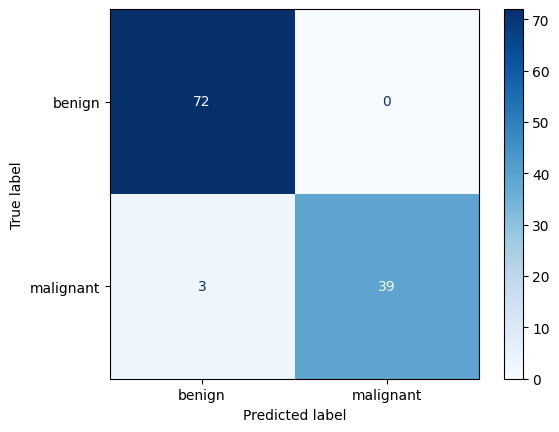

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['benign','malignant'])
disp.plot(cmap='Blues')

plt.show()

<Figure size 1000x800 with 0 Axes>

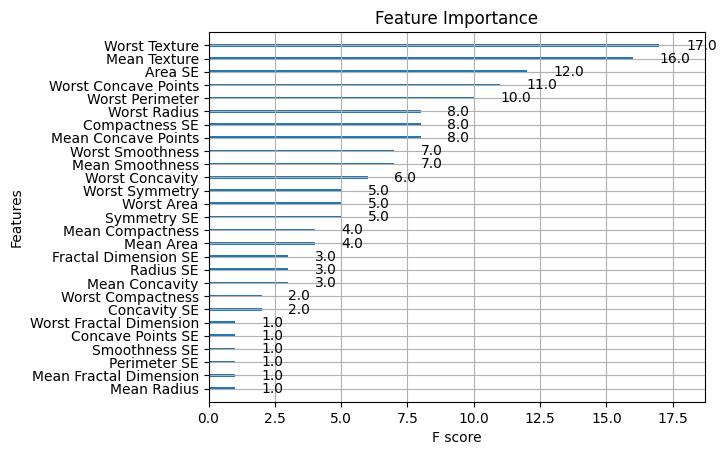

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(best_xgb, importance_type='weight')  # Use 'weight', 'gain', or 'cover'
plt.title('Feature Importance')
plt.show()

### Neural Network

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6930 - loss: 0.5805 - val_accuracy: 0.9474 - val_loss: 0.3218
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9508 - loss: 0.2867 - val_accuracy: 0.9474 - val_loss: 0.1957
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9636 - loss: 0.1826 - val_accuracy: 0.9561 - val_loss: 0.1424
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9643 - loss: 0.1341 - val_accuracy: 0.9737 - val_loss: 0.1138
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9592 - loss: 0.1374 - val_accuracy: 0.9649 - val_loss: 0.1008
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9505 - loss: 0.1133 - val_accuracy: 0.9649 - val_loss: 0.0939
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9767 - loss: 0.0831 - val_accuracy: 0.9649 - val_loss: 0.0903
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9825 - loss: 0.0769 - val_accuracy: 0.9649 - val_loss: 0.0862
Ep

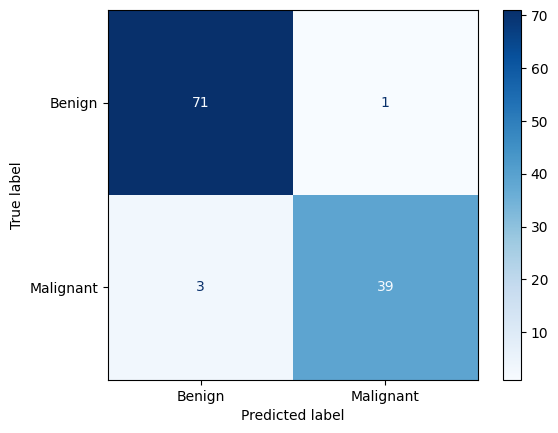

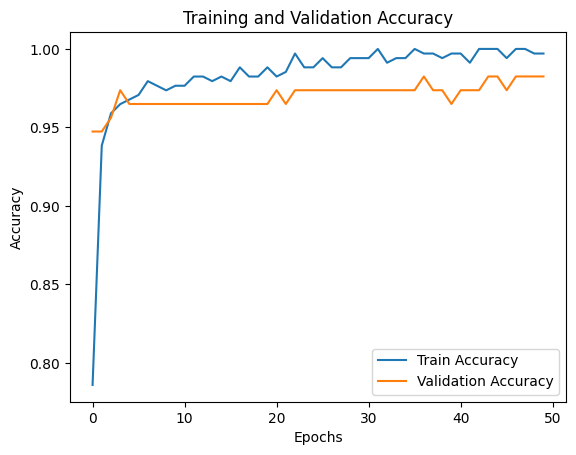

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_standardized.shape[1]),
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_standardized, y_train,
    validation_data=(X_val_standardized, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train_standardized, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_standardized, y_val, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_standardized, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions
train_pred = (model.predict(X_train_standardized) > 0.5).astype(int)
val_pred = (model.predict(X_val_standardized) > 0.5).astype(int)
test_pred = (model.predict(X_test_standardized) > 0.5).astype(int)

# Calculate F1 scores
print(f"Train F1 Score: {f1_score(y_train, train_pred):.4f}")
print(f"Validation F1 Score: {f1_score(y_val, val_pred):.4f}")
print(f"Test F1 Score: {f1_score(y_test, test_pred):.4f}")

# Confusion matrix for the test set
cm = confusion_matrix(y_test, test_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues')
plt.show()

# Visualize training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
